# Proyecto: análisis estadístico de datos

**Objetivo :** identificar si alguno de los indicadores que conforman el Índice de Desarrollo Social de la Ciudad de México muestra relación con la presencia del delito en las alcaldías de la ciudad.

# 1. Import libraries

In [263]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, chi2_contingency

# 2. Data cleaning 

Aquí limpio mi base de datos orginal y agrego los indicadores que me interesan para cada alcaldía de la Ciudad de México.

In [93]:
# Importo mi base de delitos y limpio missing values
data = pd.read_csv('datos.csv')
len(data)

106627

In [94]:
data.isna().sum() 

Unnamed: 0             0
ao_hechos             38
fecha_hechos          14
delito                 0
categoria_delito       0
alcaldia_hechos      193
colonia_hechos      2101
geopoint            1998
dtype: int64

In [95]:
delitos = data.dropna()

In [96]:
delitos.head(2)
# Me queda una base de 104466 filas.

,Unnamed: 0,ao_hechos,fecha_hechos,delito,categoria_delito,alcaldia_hechos,colonia_hechos,geopoint
0,11302,2017.0,2017-08-17 22:30:00,FEMINICIDIO,HOMICIDIO DOLOSO,GUSTAVO A MADERO,15 DE AGOSTO,"19.4845550683,-99.1071904777"
2,31913,2016.0,2016-07-12 03:30:00,FEMINICIDIO,HOMICIDIO DOLOSO,GUSTAVO A MADERO,AMPLIACIÓN GABRIEL HERNÁNDEZ,"19.50471156,-99.0992649081"


In [102]:
alcaldia = delitos.groupby(by=['alcaldia_hechos']).sum()
alcaldia

,Unnamed: 0,ao_hechos
alcaldia_hechos,,
ALVARO OBREGON,4496834116,15695167.0
AZCAPOTZALCO,2853960964,10068789.0
BENITO JUAREZ,2259260572,8102100.0
COYOACAN,3885025288,13823582.0
CUAJIMALPA DE MORELOS,1130333946,3850762.0
CUAUHTEMOC,4716944267,16735583.0
GUSTAVO A MADERO,7079684183,24547390.0
IZTACALCO,3610290614,12842722.0
IZTAPALAPA,10999970505,39209167.0


In [107]:
delitos_ind = alcaldia.drop(columns= ['ao_hechos'])
delitos_ind = delitos_ind.reset_index()
delitos_ind = delitos_ind.rename(columns= {"Unnamed: 0": "Delitos"})

In [112]:
delitos_ind.head(10)

,alcaldia_hechos,Delitos
0,ALVARO OBREGON,4496834116
1,AZCAPOTZALCO,2853960964
2,BENITO JUAREZ,2259260572
3,COYOACAN,3885025288
4,CUAJIMALPA DE MORELOS,1130333946
5,CUAUHTEMOC,4716944267
6,GUSTAVO A MADERO,7079684183
7,IZTACALCO,3610290614
8,IZTAPALAPA,10999970505
9,LA MAGDALENA CONTRERAS,2171138750


In [113]:
delitos_ind['Porcentaje'] = (delitos_ind['Delitos']/ delitos_ind['Delitos'].sum()) * 100

In [269]:
#Defino las listas de los indicadores en el orden de las alcaldías
# http://data.evalua.cdmx.gob.mx/files/indice/ids_evalua_2015.pdf

#Calidad y espacio de la vivienda
calidad_espacio = [0.71, 0.80, 0.94, 0.80, 0.69, 0.86, 0.71, 0.79, 0.66, 0.65, 0.90, 0.50, 0.61, 0.68, 0.79, 0.57]

#Acceso a salud y seguridad social
acceso_salud = [0.62, 0.71, 0.74, 0.64, 0.54, 0.65, 0.63, 0.65, 0.55, 0.61, 0.66, 0.41, 0.53, 0.54, 0.65, 0.49]

#Rezago educativo
rezago_edu = [0.95, 0.97, 0.99, 0.97, 0.94, 0.97, 0.95, 0.97, 0.94, 0.95, 0.99, 0.92, 0.94, 0.94, 0.97, 0.92]

#Bienes durables
bienes = [0.95, 0.96, 0.98, 0.96, 0.92, 0.96, 0.93, 0.96, 0.92, 0.93, 0.98, 0.82, 0.90, 0.92, 0.95, 0.87]

#Adecuación sanitaria 
adecua_san= [0.90, 0.95, 0.99, 0.94, 0.80, 0.97, 0.89, 0.93, 0.84, 0.85, 0.98, 0.52, 0.74, 0.69, 0.95, 0.56]

#Adecuación energética 
adecua_ener = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#Índice de Desarrollo Social (valor)
índice_desarrollo = [0.82, 0.88, 0.96, 0.88, 0.80, 0.89, 0.82, 0.86, 0.77, 0.79, 0.93, 0.64, 0.74, 0.78, 0.86, 0.70]

In [271]:
delitos_ind['Calidad_espacio_vivienda'] = calidad_espacio
delitos_ind['Acceso_salud_seguridad'] = acceso_salud
delitos_ind['Rezago_educativo'] = rezago_edu
delitos_ind['Bienes_durables'] = bienes
delitos_ind['Adecuacion_Sanitaria'] = adecua_san
delitos_ind['Adecuacion_Energética'] = adecua_ener
delitos_ind['IDS'] = índice_desarrollo

Aquí obtengo mi primer dataframe 'limpio': Delitos e Índice de Desarrollo Social por Alcaldía

In [272]:
delitos_ind

,alcaldia_hechos,Delitos,Porcentaje,Calidad_espacio_vivienda,Acceso_salud_seguridad,Rezago_educativo,Bienes_durables,Adecuacion_Sanitaria,Adecuacion_Energética,IDS
0,ALVARO OBREGON,4496834116,7.529882,0.71,0.62,0.95,0.95,0.90,1.0,0.82
1,AZCAPOTZALCO,2853960964,4.778915,0.80,0.71,0.97,0.96,0.95,1.0,0.88
2,BENITO JUAREZ,2259260572,3.783098,0.94,0.74,0.99,0.98,0.99,1.0,0.96
3,COYOACAN,3885025288,6.505417,0.80,0.64,0.97,0.96,0.94,1.0,0.88
4,CUAJIMALPA DE MORELOS,1130333946,1.892727,0.69,0.54,0.94,0.92,0.80,1.0,0.80
5,CUAUHTEMOC,4716944267,7.898453,0.86,0.65,0.97,0.96,0.97,1.0,0.89
6,GUSTAVO A MADERO,7079684183,11.854826,0.71,0.63,0.95,0.93,0.89,1.0,0.82
7,IZTACALCO,3610290614,6.045378,0.79,0.65,0.97,0.96,0.93,1.0,0.86
8,IZTAPALAPA,10999970505,18.419288,0.66,0.55,0.94,0.92,0.84,1.0,0.77
9,LA MAGDALENA CONTRERAS,2171138750,3.635540,0.65,0.61,0.95,0.93,0.85,1.0,0.79


Trabajo ahora con los añosde la base orginal para poder hacer una serie de tiempo con los tipos de delito

In [117]:
delitos.head(2)

,Unnamed: 0,ao_hechos,fecha_hechos,delito,categoria_delito,alcaldia_hechos,colonia_hechos,geopoint
0,11302,2017.0,2017-08-17 22:30:00,FEMINICIDIO,HOMICIDIO DOLOSO,GUSTAVO A MADERO,15 DE AGOSTO,"19.4845550683,-99.1071904777"
2,31913,2016.0,2016-07-12 03:30:00,FEMINICIDIO,HOMICIDIO DOLOSO,GUSTAVO A MADERO,AMPLIACIÓN GABRIEL HERNÁNDEZ,"19.50471156,-99.0992649081"


In [248]:
prueba = delitos.groupby(['ao_hechos','delito']).size().reset_index()

In [207]:
violencia = prueba[prueba['delito'].isin(['VIOLENCIA FAMILIAR'])]
violencia = violencia.rename(columns= {"ao_hechos": "Año", "0": "Frecuencia"})
violencia= violencia.set_index('Año')
violencia.columns= ['deñito', 'frecuencia']
violencia.head()

,deñito,frecuencia
Año,,
1906.0,VIOLENCIA FAMILIAR,1
1942.0,VIOLENCIA FAMILIAR,1
1964.0,VIOLENCIA FAMILIAR,1
1969.0,VIOLENCIA FAMILIAR,1
1972.0,VIOLENCIA FAMILIAR,2


In [206]:
feminicidio = prueba[prueba['delito'].isin(['FEMINICIDIO', 'FEMINICIDIO POR ARMA BLANCA', 'FEMINICIDIO POR DISPARO DE ARMA DE FUEGO', 'FEMINICIDIO POR GOLPES'])]
feminicidio = feminicidio.rename(columns= {"ao_hechos": "Año"})
feminicidio = feminicidio.set_index('Año')
feminicidio.columns = ['delito', 'frecuencia']
feminicidio.head()

,delito,frecuencia
Año,,
2016.0,FEMINICIDIO,47
2017.0,FEMINICIDIO,41
2018.0,FEMINICIDIO,41
2019.0,FEMINICIDIO,28
2019.0,FEMINICIDIO POR ARMA BLANCA,16


In [139]:
#También saqué mi array de datetime para la base principal pero no pude hacer mi serie de tiempo porque me faltaban las frecuencias
delitos.date = pd.to_datetime(delitos.date)
delitos.index = pd.DatetimeIndex(delitos.date)
delitos.index

DatetimeIndex(['2017-08-17 22:30:00+00:00', '2016-07-12 03:30:00+00:00',
               '2016-02-05 09:00:00+00:00', '2016-02-08 12:20:00+00:00',
               '2016-02-19 08:30:00+00:00', '2016-09-11 12:30:00+00:00',
               '2016-09-11 18:35:00+00:00', '2016-03-09 19:50:00+00:00',
               '2016-03-12 07:30:00+00:00', '2016-03-15 21:00:00+00:00',
               ...
               '2020-10-31 09:30:00+00:00', '2020-10-31 02:00:00+00:00',
               '2020-10-31 04:00:00+00:00', '2020-04-13 14:00:00+00:00',
               '2020-10-31 15:20:00+00:00', '2020-10-31 13:30:00+00:00',
               '2020-10-28 22:13:00+00:00', '2020-10-31 15:30:00+00:00',
               '2020-10-31 18:00:00+00:00', '2020-10-31 19:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='fecha_hechos', length=104466, freq=None)

# 3. Hypothesis testing

H0: El IDS no influye en la presencia del delito de género en las alcaldías de la CDMX.
<br>H1: El IDS influye en la presencia del delito de género en las alcaldías de la CDMX.

# 4. Correlation

Matrices de correlación y mapeo de correlaciones

In [166]:
corr = delitos_ind.corr()

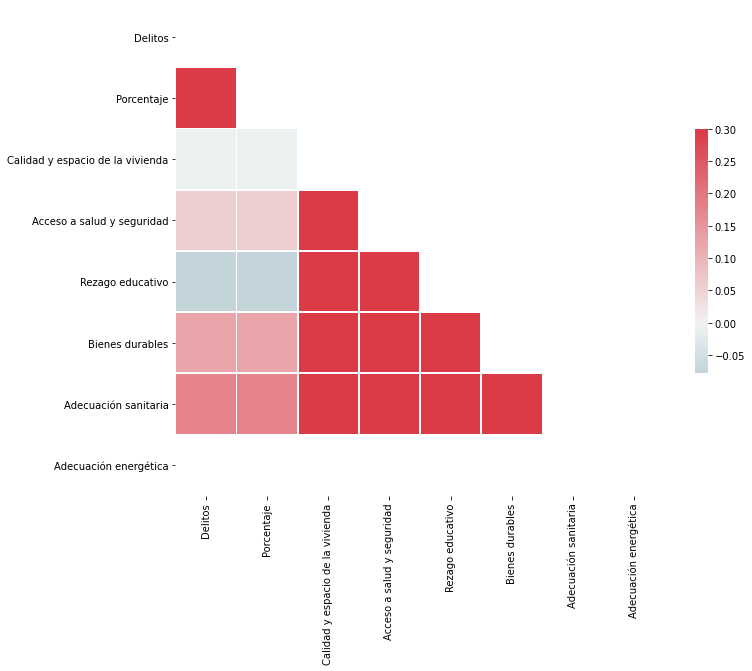

In [167]:
#Mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Figure
f, ax = plt.subplots(figsize=(11, 9))

#Colormap
colmap = sns.diverging_palette(220, 10, as_cmap=True)

#Heatmap
sns.heatmap(corr, mask=mask, cmap=colmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

De acuerdo con la matriz de correlación, los indices de desarrollo urbano no son muy representativos respecto a los Delitos por alcaldía. Sin embargo hay dos indicadores que son menos relevantes para los delitos en las alcaldías: el rezago educativo y la calidad y espacio de la vivienda. 

In [170]:
corr['Delitos']

Delitos                             1.000000
Porcentaje                          1.000000
Calidad y espacio de la vivienda   -0.005201
Acceso a salud y seguridad          0.057427
Rezago educativo                   -0.077885
Bienes durables                     0.124968
Adecuación sanitaria                0.179336
Adecuación energética                    NaN
Name: Delitos, dtype: float64

La variable que muestran una "mayor correlación" con los delitos es la adecuación sanitaria, sin embargo  es sumamente pequeña, por lo cual no es realmente significativa. Como puede apreciarse en el próximo scatter plot no podemos hablar de una correlación para esta variable respecto a la presencia del delito.

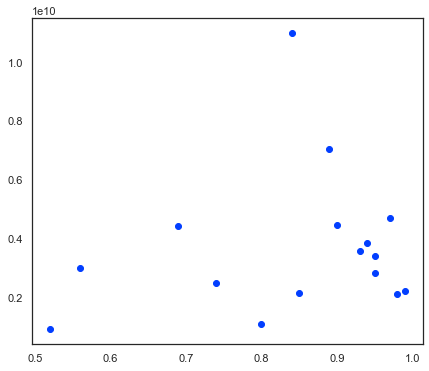

In [191]:
sns.set(style='white', palette='bright', rc={'figure.figsize':(7,6)})
plt.scatter(delitos_ind.Adecuacion_Sanitaria, delitos_ind.Delitos);

# 5. Regression
Regresión lineal delitos - indicadores de desarrollo

In [273]:
X = sm.add_constant(delitos_ind.Rezago_educativo)
Y = delitos_ind.Porcentaje

model = sm.OLS(Y,X).fit()
predictions= model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Porcentaje   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                   0.08544
Date:                Tue, 26 Jan 2021   Prob (F-statistic):              0.774
Time:                        20:07:43   Log-Likelihood:                -44.778
No. Observations:                  16   AIC:                             93.56
Df Residuals:                      14   BIC:                             95.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.4234     48.500  

/usr/local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [274]:
X = sm.add_constant(delitos_ind.Acceso_salud_seguridad)
Y = delitos_ind.Porcentaje

model = sm.OLS(Y,X).fit()
predictions= model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Porcentaje   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.068
Method:                 Least Squares   F-statistic:                   0.04632
Date:                Tue, 26 Jan 2021   Prob (F-statistic):              0.833
Time:                        20:08:05   Log-Likelihood:                -44.800
No. Observations:                  16   AIC:                             93.60
Df Residuals:                      14   BIC:                             95.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4

/usr/local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [275]:
X = sm.add_constant(delitos_ind.Calidad_espacio_vivienda)
Y = delitos_ind.Porcentaje

model = sm.OLS(Y,X).fit()
predictions= model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Porcentaje   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.071
Method:                 Least Squares   F-statistic:                 0.0003786
Date:                Tue, 26 Jan 2021   Prob (F-statistic):              0.985
Time:                        20:08:26   Log-Likelihood:                -44.826
No. Observations:                  16   AIC:                             93.65
Df Residuals:                      14   BIC:                             95.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [276]:
X = sm.add_constant(delitos_ind.Bienes_durables)
Y = delitos_ind.Porcentaje

model = sm.OLS(Y,X).fit()
predictions= model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Porcentaje   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                    0.2221
Date:                Tue, 26 Jan 2021   Prob (F-statistic):              0.645
Time:                        20:08:40   Log-Likelihood:                -44.701
No. Observations:                  16   AIC:                             93.40
Df Residuals:                      14   BIC:                             94.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.2107     24.341     

/usr/local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [277]:
X = sm.add_constant(delitos_ind.Adecuacion_Sanitaria)
Y = delitos_ind.Porcentaje

model = sm.OLS(Y,X).fit()
predictions= model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Porcentaje   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.4652
Date:                Tue, 26 Jan 2021   Prob (F-statistic):              0.506
Time:                        20:08:58   Log-Likelihood:                -44.565
No. Observations:                  16   AIC:                             93.13
Df Residuals:                      14   BIC:                             94.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.9999 

/usr/local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Conclusión general
Ninguno de los modelos de gresión muestra un buen ajuste. Esto nos indica que los indicadores que conformarn el índice de desarrollo de la Ciudad de México no tienen ninguna representatividad o significancia respecto a la presencia de delitos en la alcaldías de la ciudad. Por tanto, no se puede proceder a rechazar la hipótesis nula.